<a href="https://colab.research.google.com/github/ArindamRoy23/DSBA_T2_MLNS/blob/main/Community_Detection_community_louvai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib.pyplot as plt
from multiprocessing import Pool
import itertools
import networkx as nx
import community.community_louvain as community_louvai
import numpy as np

In [7]:
# Reference Paper: https://iopscience.iop.org/article/10.1088/1742-5468/2008/10/P10008/pdf



# Load the dataset
circles_file = "facebook_combined.txt"
G = nx.read_edgelist(circles_file)

# Compute the communities using the Louvain algorithm
partition = community_louvai.best_partition(G)

# Print the number of communities found
num_communities = len(set(partition.values()))
print("Number of communities found: ", num_communities)

# Print the nodes and their respective communities
for node, community_id in partition.items():
    print("Node:", node, "Community:", community_id)

Number of communities found:  16
Node: 0 Community: 0
Node: 1 Community: 0
Node: 2 Community: 0
Node: 3 Community: 0
Node: 4 Community: 0
Node: 5 Community: 0
Node: 6 Community: 0
Node: 7 Community: 0
Node: 8 Community: 0
Node: 9 Community: 0
Node: 10 Community: 0
Node: 11 Community: 0
Node: 12 Community: 0
Node: 13 Community: 0
Node: 14 Community: 0
Node: 15 Community: 0
Node: 16 Community: 0
Node: 17 Community: 0
Node: 18 Community: 0
Node: 19 Community: 0
Node: 20 Community: 0
Node: 21 Community: 0
Node: 22 Community: 0
Node: 23 Community: 0
Node: 24 Community: 0
Node: 25 Community: 0
Node: 26 Community: 0
Node: 27 Community: 0
Node: 28 Community: 0
Node: 29 Community: 0
Node: 30 Community: 0
Node: 31 Community: 0
Node: 32 Community: 0
Node: 33 Community: 0
Node: 34 Community: 1
Node: 35 Community: 0
Node: 36 Community: 0
Node: 37 Community: 0
Node: 38 Community: 0
Node: 39 Community: 0
Node: 40 Community: 0
Node: 41 Community: 0
Node: 42 Community: 0
Node: 43 Community: 0
Node: 44 

Number of communities found: 16


/usr/local/lib/python3.9/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


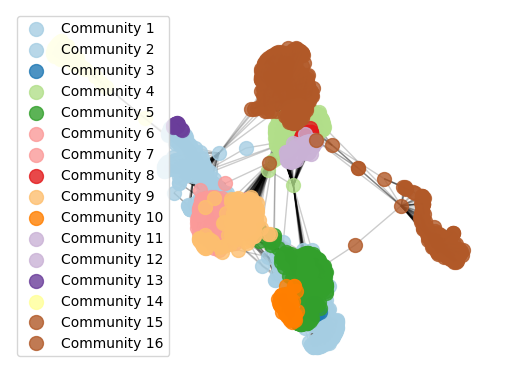

In [16]:

# Print the number of communities found
num_communities = len(set(partition.values()))
print("Number of communities found:", num_communities)

# Create a colormap for the communities
cmap = plt.get_cmap("Paired")
colors = [cmap(i) for i in np.linspace(0, 1, num_communities)]



ValueError: ignored

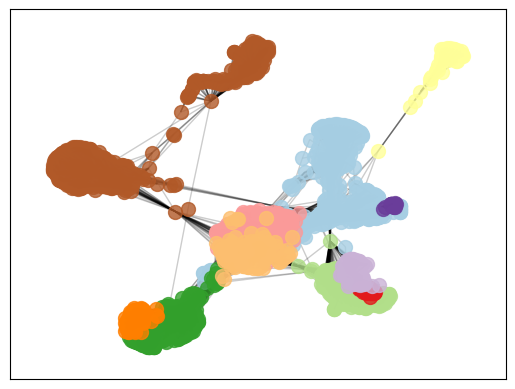

In [17]:
# Plot the nodes and edges with community colors
pos = nx.spring_layout(G)
for i, community in enumerate(set(partition.values())):
    nodes = [node for node in partition.keys() if partition[node] == community]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors[i], node_size=100, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.2)

# Add a legend
plt.legend(["Community {}".format(i+1) for i in range(num_communities)], loc="bottom right")

# Show the plot
plt.axis("off")
plt.show()

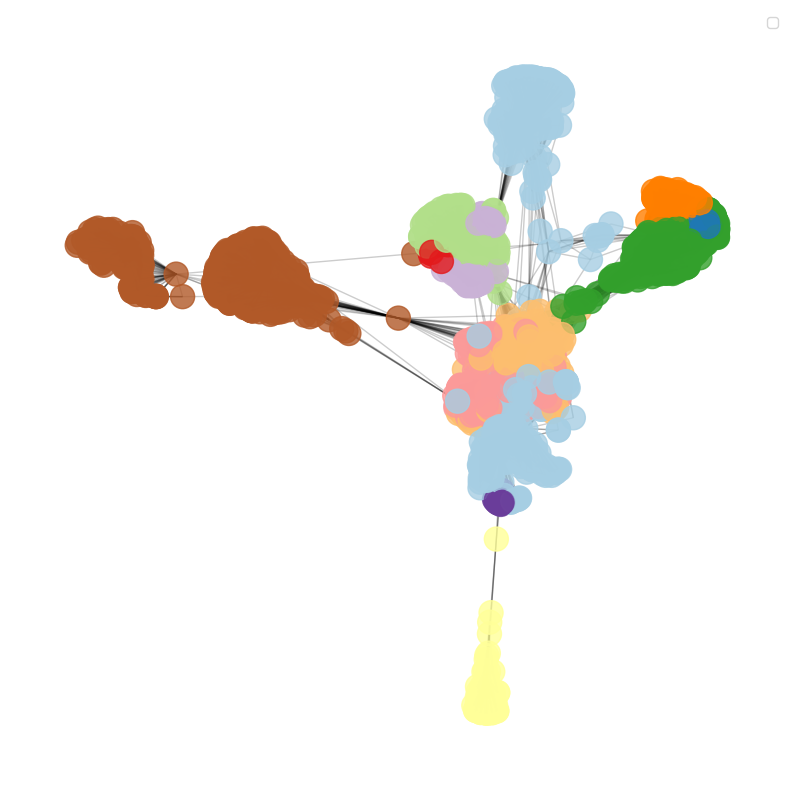

In [13]:
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap="Paired", alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.2)
plt.axis("off")
plt.legend()
plt.show()

In [2]:
g_facebook = nx.read_edgelist(r"facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

In [6]:
!pip install torch-geometric


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.9 MB/s eta 0:00:00
  Created wheel for torch-geometric: filename=torch_geometric-1.7.0-py3-none-any.whl size=365400 sha256=49b4fb521bb605ed98cefbbb6bdd5138adf6ff8a8a5cb4ac133c476bc455d6f7
  Stored in directory: /root/.cache/pip/wheels/2e/d3/74/806531587f68291f14c3ec8aa4eaf798cbce7087109c618143
Successfully built torch-geometric
  Attempting uninstall: torch-geometric
    Found existing installation: torch-geometric 2.3.0
    Uninstalling torch-geometric-2.3.0:
      Successfully uninstalled torch-geometric-2.3.0


In [3]:
!pip install torch_sparse


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached torch_sparse-0.6.17.tar.gz (209 kB)
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user


In [3]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv

# Define the GAT model
class GAT(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GAT, self).__init__()
        self.conv1 = GATConv(num_features, 16, heads=8, dropout=0.6)
        self.conv2 = GATConv(16*8, num_classes, heads=1, dropout=0.6)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Define the training loop
def train(model, optimizer, data):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

# Define the evaluation function
def evaluate(model, data):
    model.eval()
    out = model(data.x, data.edge_index)
    pred = out.argmax(dim=1)
    test_correct = pred[data.test_mask] == data.y[data.test_mask]
    test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
    return test_acc

# Load the dataset
from torch_geometric.datasets import KarateClub
dataset = KarateClub()

# Split the dataset into train, validation, and test sets
from torch_geometric.data import train_test_split
data = dataset[0]
# data.train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
# data.train_mask[:30] = 1
# data.val_mask = None
# data.test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
# data.test_mask[30:] = 1

# # Initialize the model and optimizer
# model = GAT(dataset.num_features, dataset.num_classes)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# # Train the model
# for epoch in range(1, 201):
#     train_loss = train(model, optimizer, data)
#     if epoch % 20 == 0:
#         test_acc = evaluate(model, data)
#         print(f'Epoch: {epoch:03d}, Loss: {train_loss:.4f}, Test Acc: {test_acc:.4f}')


ModuleNotFoundError: ignored